# 10 Academy: Artificial Intelligence Mastery
## Project: Change point analysis and statistical modelling of time series data - detecting changes and associating causes on time series data
### Advanced Analysis of Brent Oil Prices
#### Ethel.C

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

scripts_dir = r'E:\DS+ML\AIM3\Week.10\Week.10.Brent_Oil_Price_Impacts\scripts'
src_dir = r'E:\DS+ML\AIM3\Week.10\Week.10.Brent_Oil_Price_Impacts\src'
data_path = r"E:\DS+ML\AIM3\Week.10\Data\merged_brent_events.csv"
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)
if src_dir not in sys.path:
    sys.path.append(src_dir)
from models import OilPriceModels
from ml_models import LSTMOilPredictor
from data import BrentDataLoader
loader = BrentDataLoader(data_path)
df = loader.get_data()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ethio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df.head()

,Price,Event_Type,Event_Description,Returns,Gulf_War,Financial_Crisis,Covid_Impact,Oil_Price_War,Event_Sentiment
Date,,,,,,,,,
1987-05-20,18.63,None,None,NaN,0,0,0,0,0.0
1987-05-21,18.45,None,None,-0.966184,0,0,0,0,0.0
1987-05-22,18.55,None,None,0.542005,0,0,0,0,0.0
1987-05-25,18.60,None,None,0.269542,0,0,0,0,0.0
1987-05-26,18.63,None,None,0.161290,0,0,0,0,0.0


In [3]:
print(df[['Price', 'Returns', 'Gulf_War', 'Financial_Crisis', 'Covid_Impact', 'Oil_Price_War', 'Event_Sentiment']].dtypes)
print(df[['Price', 'Returns', 'Gulf_War', 'Financial_Crisis', 'Covid_Impact', 'Oil_Price_War', 'Event_Sentiment']].isnull().sum())
print(f"Dataset size: {len(df)} rows, {df.shape[1]} columns")

Price               float64
Returns             float64
Gulf_War              int32
Financial_Crisis      int32
Covid_Impact          int32
Oil_Price_War         int32
Event_Sentiment     float64
dtype: object
Price               0
Returns             1
Gulf_War            0
Financial_Crisis    0
Covid_Impact        0
Oil_Price_War       0
Event_Sentiment     0
dtype: int64
Dataset size: 8360 rows, 9 columns


In [4]:
for event in ['Gulf_War', 'Financial_Crisis', 'Covid_Impact', 'Oil_Price_War']:
    event_impact = df.groupby(event)[['Price', 'Returns']].mean()
    print(f"Average {event} Impact on Price and Returns:\n", event_impact)

Average Gulf_War Impact on Price and Returns:
               Price   Returns
Gulf_War                     
0         48.065417  0.021416
1         21.897661  0.028000
Average Financial_Crisis Impact on Price and Returns:
                       Price   Returns
Financial_Crisis                     
0                 44.884163  0.032830
1                 96.944348 -0.330933
Average Covid_Impact Impact on Price and Returns:
                   Price   Returns
Covid_Impact                     
0             46.468287  0.041105
1             45.544615 -2.025580
Average Oil_Price_War Impact on Price and Returns:
                    Price   Returns
Oil_Price_War                     
0              46.468287  0.041105
1              45.544615 -2.025580


Iteration:      1,   Func. Count:      6,   Neg. LLF: 67039217.991190486
Iteration:      2,   Func. Count:     15,   Neg. LLF: 52615.743319716144
Iteration:      3,   Func. Count:     21,   Neg. LLF: 17768.797056512292
Iteration:      4,   Func. Count:     27,   Neg. LLF: 17818.18524647027
Iteration:      5,   Func. Count:     33,   Neg. LLF: 17774.065855444464
Iteration:      6,   Func. Count:     39,   Neg. LLF: 17712.942029087142
Iteration:      7,   Func. Count:     44,   Neg. LLF: 17773.27714751207
Iteration:      8,   Func. Count:     50,   Neg. LLF: 19984.681284493443
Iteration:      9,   Func. Count:     58,   Neg. LLF: 17712.183609708914
Iteration:     10,   Func. Count:     63,   Neg. LLF: 17712.183367954618
Iteration:     11,   Func. Count:     68,   Neg. LLF: 17712.183366656784
Iteration:     12,   Func. Count:     72,   Neg. LLF: 17712.18336665676
Optimization terminated successfully    (Exit mode 0)
            Current function value: 17712.183366656784
            Iterat

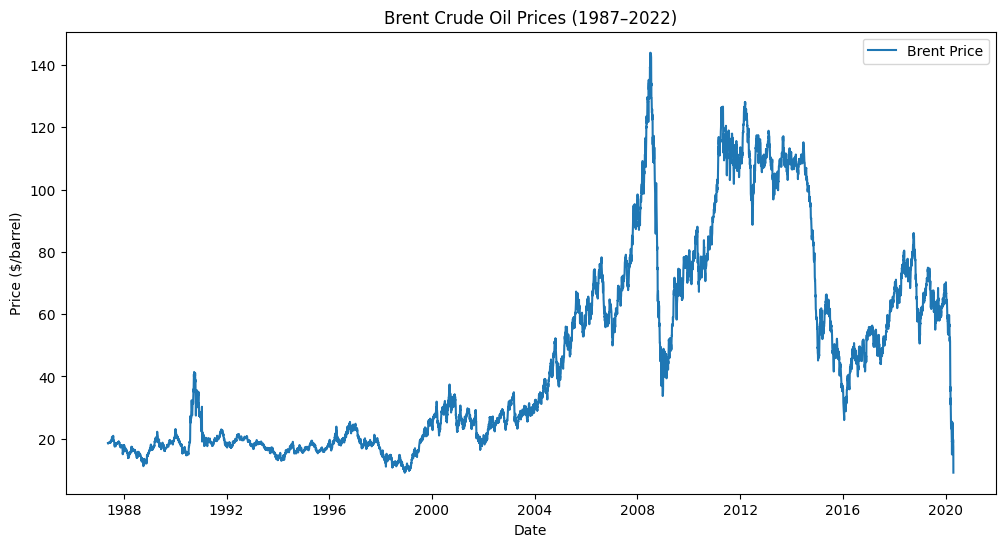

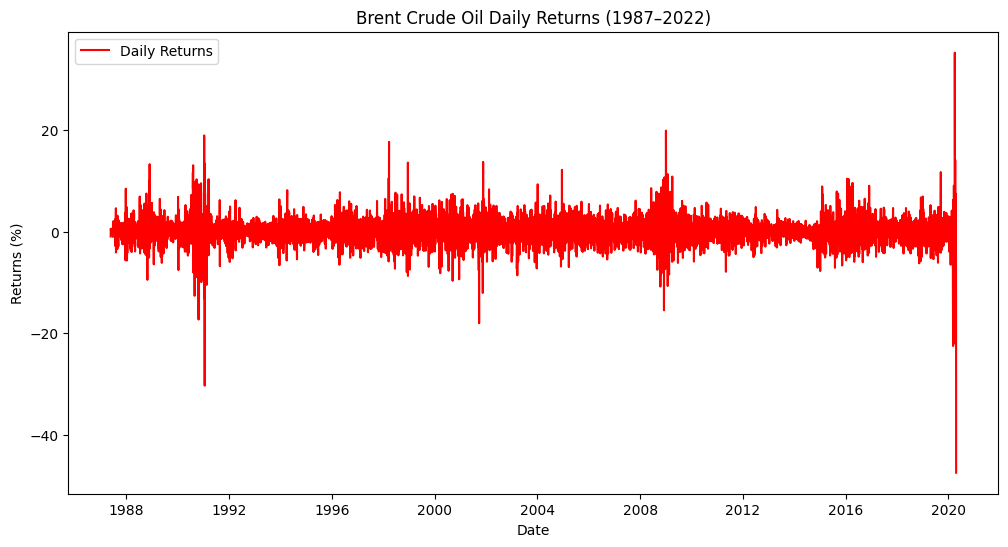

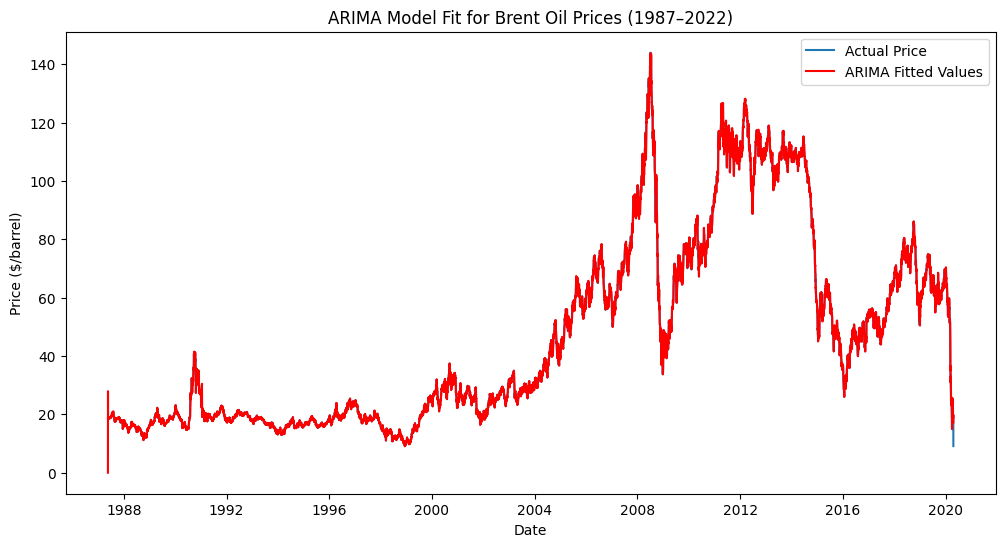

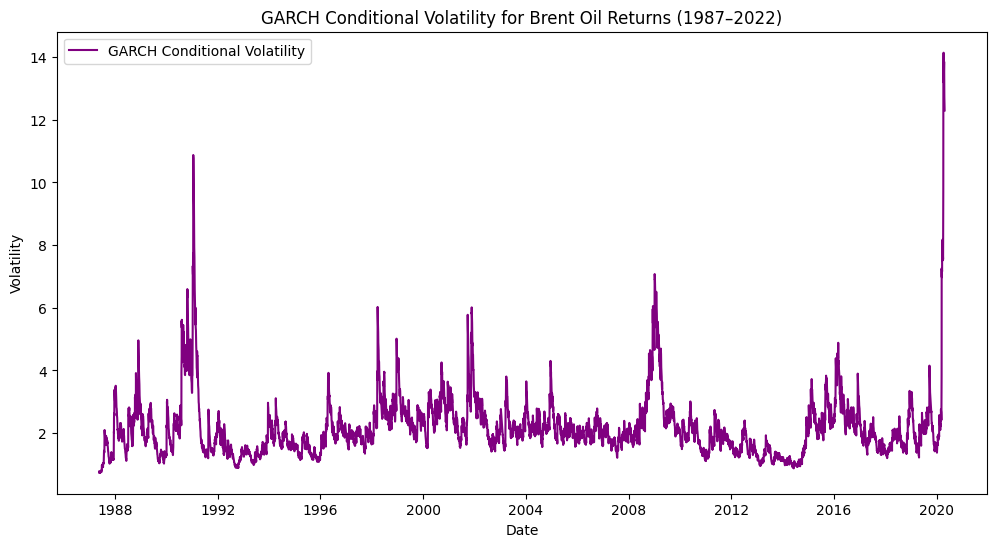

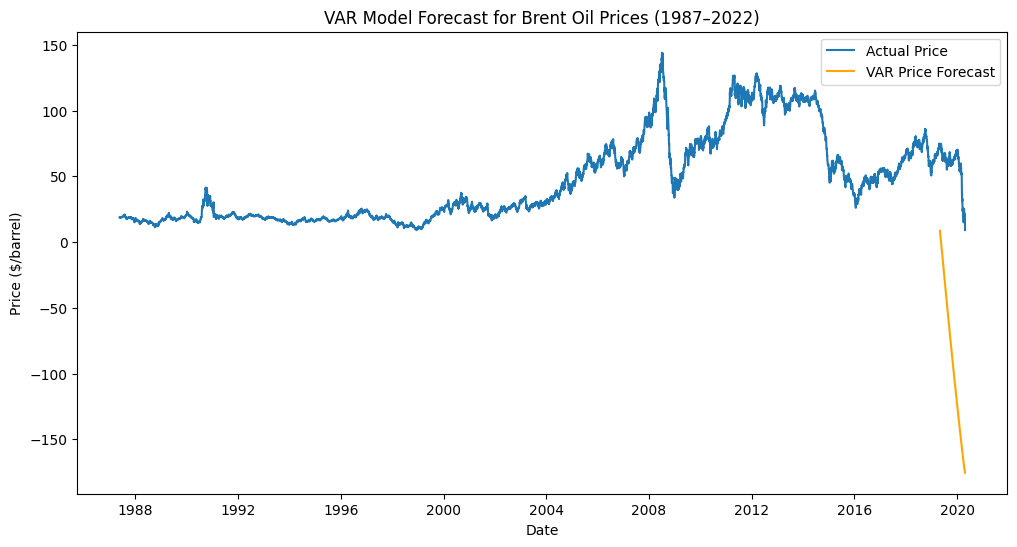

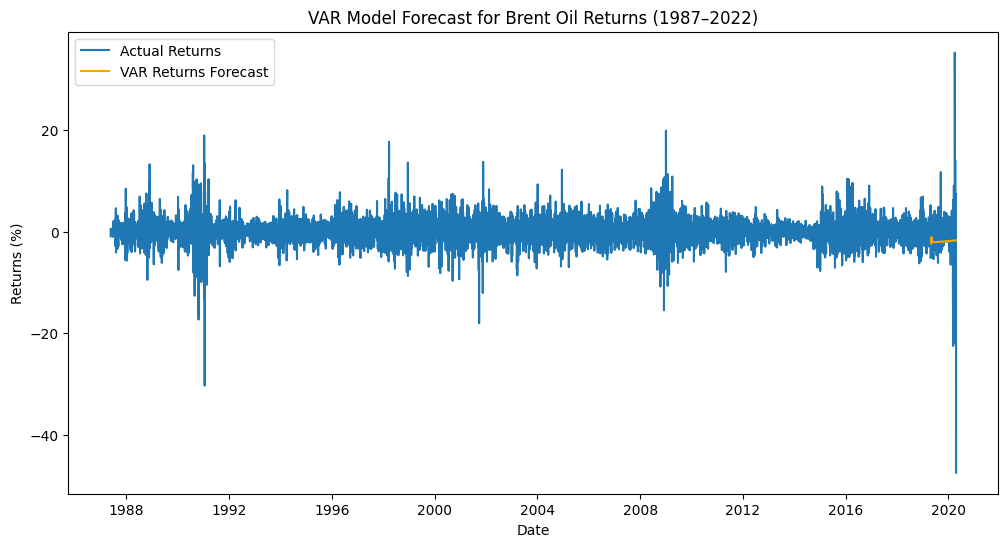

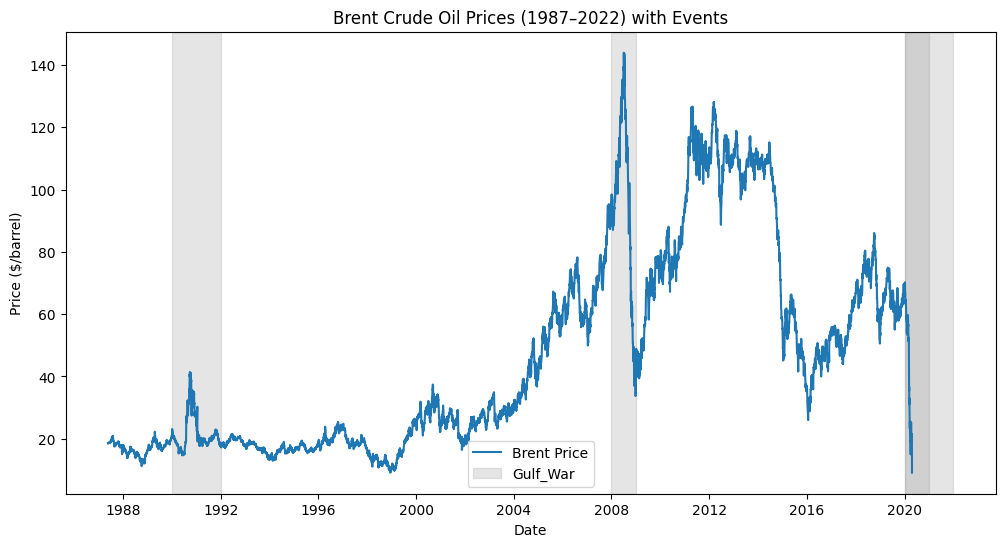

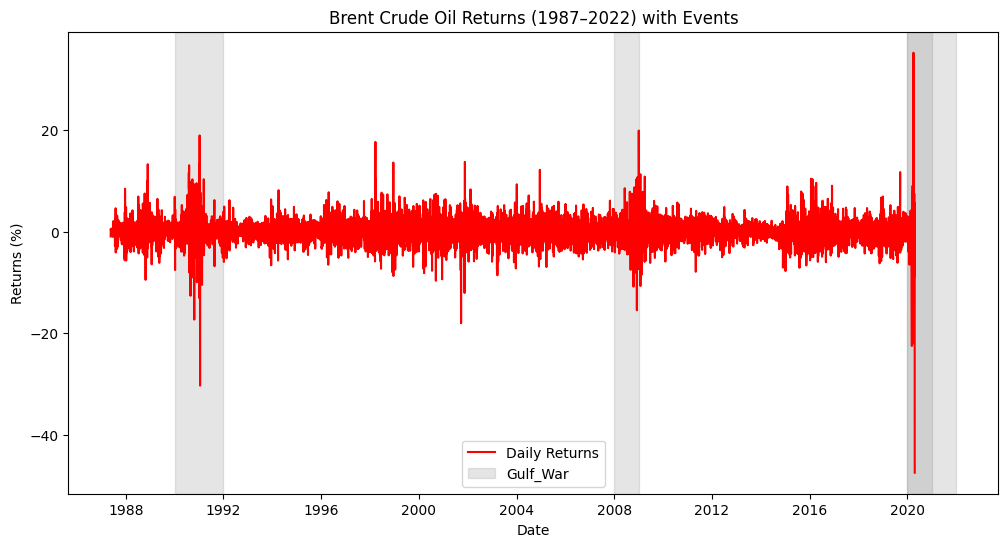

In [5]:

model = OilPriceModels(df)
model.analyze_and_plot()

### LSTM

In [6]:
lstm = LSTMOilPredictor(df)
X, y = lstm.prepare_data()
model = lstm.build_model()
lstm.train_model(X, y)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - loss: 0.0125
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 3.6765e-04
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 3.3779e-04
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 2.8656e-04
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - loss: 2.5169e-04
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 2.1899e-04
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 1.9835e-04
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 1.7196e-04
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 1.5729e-04
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.4114e-04
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - loss: 1.2882e-04
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - loss: 1.3222e-04
Epoch 13/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 1.3348e-04
Epoch 14/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/ste

### Save Model

In [7]:
import joblib
joblib.dump(model, "lstm_oil_price_model.pkl")
print("Model saved successfully!")

Model saved successfully!
